In [14]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [15]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [16]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [17]:
df['year'] = df.Day.apply(lambda x: x.year)
mean_ts = df.groupby(['year']).t.mean()
max_t, min_t = mean_ts.max(), mean_ts.min()
'Самый холодный - {}, самый теплый - {}'.format(mean_ts[mean_ts == min_t].index.values,
 mean_ts[mean_ts == max_t].index.values)

'Самый холодный - [2012], самый теплый - [2015]'

**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [18]:
df['month'] = df.Day.apply(lambda x: x.month)
jan_ts = df[(df.month == 1) & (df.t >= 0)].groupby(['year']).t.count()
max_t = jan_ts.max()
print(jan_ts[jan_ts == max_t].index.values)

[2008]


**3.** В каком году было самое холодное лето (по средней температуре)

In [19]:
mean_ts = df[df.month.isin([6, 7, 8])].groupby(by='year').t.mean()
min_t = mean_ts.min()
print(mean_ts[mean_ts == min_t].index.values)

[2008]


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [20]:
df['del_t'] = abs(df.t - df.t.shift(-1))
max_t = df['del_t'].max()
pd.to_datetime(df[df.del_t == max_t].Day.values[0]).strftime('%Y.%m.%d')

'2014.05.26'

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

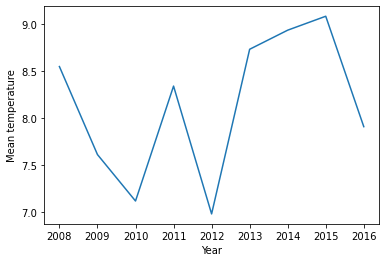

In [21]:
mean_ts = df.groupby(['year']).t.mean()
mean_ts.plot()
plt.xlabel("Year")
plt.ylabel("Mean temperature")
plt.show()